In [1]:
import numpy as np
from numpy import pi, log, exp, sqrt
import matplotlib.pyplot as plt
from scipy.constants import c, hbar, m_e, e, alpha
from scipy.special import gamma

In [2]:
ES = m_e**2 * c**3 / (e*hbar); # [V/m]

In [3]:
def EfEe(Ee, I0, tauT, λμm):
    
    """
        Ee [GeV x e]
        I0 [W/cm^2]
        tauT [in units of T]
        λμm [μm]
    """

    T = 0.67 * λμm * 1e-6 / c ;
    tau = tauT * T;
    γe = Ee / (m_e*c**2);
    ω0 = 2 *pi* c / (λμm*1e-6);
    E0 = 0.855 * λμm * sqrt(I0*1e-18) * m_e * ω0 * c / e;
    χe = 2 * γe * E0 / ES;
    Wγ = 3**(2 / 3) * 28 * gamma(2 / 3) * alpha * m_e**2 * c**4 * χe**(2/3) / (54*hbar*Ee) ;
    tc = tau / (2 * sqrt(2*log(2)));
    pc = Wγ * tc;
    ℰc = (1 - 16 / 63)**pc * Ee;

    return (47/63)**(0.0301991*c**4*m_e**2*(sqrt(I0)*Ee/(e*ES))**(2/3)*alpha*tau/(Ee*hbar))

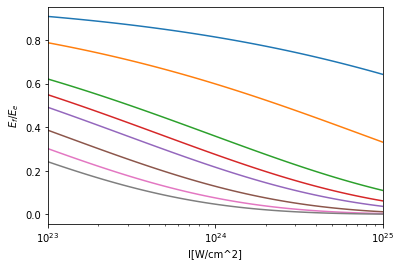

In [5]:
I0lst = np.logspace(23,25)

plt.plot(I0lst, EfEe(Ee=100e9*e, I0=I0lst, tauT=1, λμm=0.2), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=100e9*e, I0=I0lst, tauT=1, λμm=0.5), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=100e9*e, I0=I0lst, tauT=1, λμm=1), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=50e9*e, I0=I0lst, tauT=1, λμm=1), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=30e9*e, I0=I0lst, tauT=1, λμm=1), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=100e9*e, I0=I0lst, tauT=2, λμm=1), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=50e9*e, I0=I0lst, tauT=2, λμm=1), label=r'$$' )
plt.plot(I0lst, EfEe(Ee=30e9*e, I0=I0lst, tauT=2, λμm=1), label=r'$$' )
plt.xscale('log')
plt.xlim([1e23,1e25])
plt.xlabel(r'I[W/cm^2]')
plt.ylabel(r'$E_f/E_e$')
plt.show()